In [1]:
pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.5 MB/s eta 0:00:00


In [2]:
pip install gtts


In [4]:
import pandas  as  pd
from gtts import gTTS
from IPython.display import Audio
import tkinter as tk
from tkinter import font
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
data = pd.read_csv("/content/Student_Mental_health (3).csv")
print(data)
data.dropna(inplace=True)
data.columns = data.columns.str.strip()
print (data.columns)
data["Age"] = data["Age"].astype(int)
data["Do you have Depression?"] = data["Do you have Depression?"].apply(lambda x: x.strip().lower())
data["Do you have Anxiety?"] = data["Do you have Anxiety?"].apply(lambda x: x.strip().lower())
data["Do you have Panic attack?"] = data["Do you have Panic attack?"].apply(lambda x: x.strip().lower())
data["Did you seek any specialist for a treatment?"] = data["Did you seek any specialist for a treatment?"].apply(lambda x: x.strip().lower())
data["Choose your gender"] = data["Choose your gender"].apply(lambda x: x.strip().lower())
data["What is your course?"] = data["What is your course?"].apply(lambda x: x.strip().lower()[:3])
data["Your current year of Study"] = data["Your current year of Study"].apply(lambda x: int(x.strip().lower()[5]))
print(type(data["Age"]))

data["What is your CGPA?"] = data["What is your CGPA?"].apply(lambda x: (float(x.strip().split()[0])+float(x.strip().split()[2]))/2)
data["Marital status"] = data["Marital status"].apply(lambda x: x.strip().lower())
data.drop(columns=["Timestamp"], inplace=True)
print (data)
# Create unique course dictionary
uni = list(data['What is your course?'].unique())
unid = {course: index for index, course in enumerate(uni)}

data.replace({"male": 0, "female": 1}, inplace=True)
data.replace(unid, inplace=True)
data.replace({"yes": 0, "no": 1}, inplace=True)
data.replace({"male": 0, "female": 1}, inplace=True)
data.replace(unid, inplace=True)
data.replace({"yes": 0, "no": 1}, inplace=True)


               Timestamp Choose your gender   Age What is your course?  \
0         8/7/2020 12:02             Female  18.0          Engineering   
1         8/7/2020 12:04               Male  21.0    Islamic education   
2         8/7/2020 12:05               Male  19.0                  BIT   
3         8/7/2020 12:06             Female  22.0                 Laws   
4         8/7/2020 12:13               Male  23.0         Mathemathics   
..                   ...                ...   ...                  ...   
96   13/07/2020 19:56:49             Female  21.0                  BCS   
97   13/07/2020 21:21:42               Male  18.0          Engineering   
98   13/07/2020 21:22:56             Female  19.0             Nursing    
99   13/07/2020 21:23:57             Female  23.0     Pendidikan Islam   
100  18/07/2020 20:16:21               Male  20.0   Biomedical science   

    Your current year of Study What is your CGPA? Marital status  \
0                       year 1        3.00 

In [5]:
!pip install customtkinter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.1/296.1 kB 5.7 MB/s eta 0:00:00


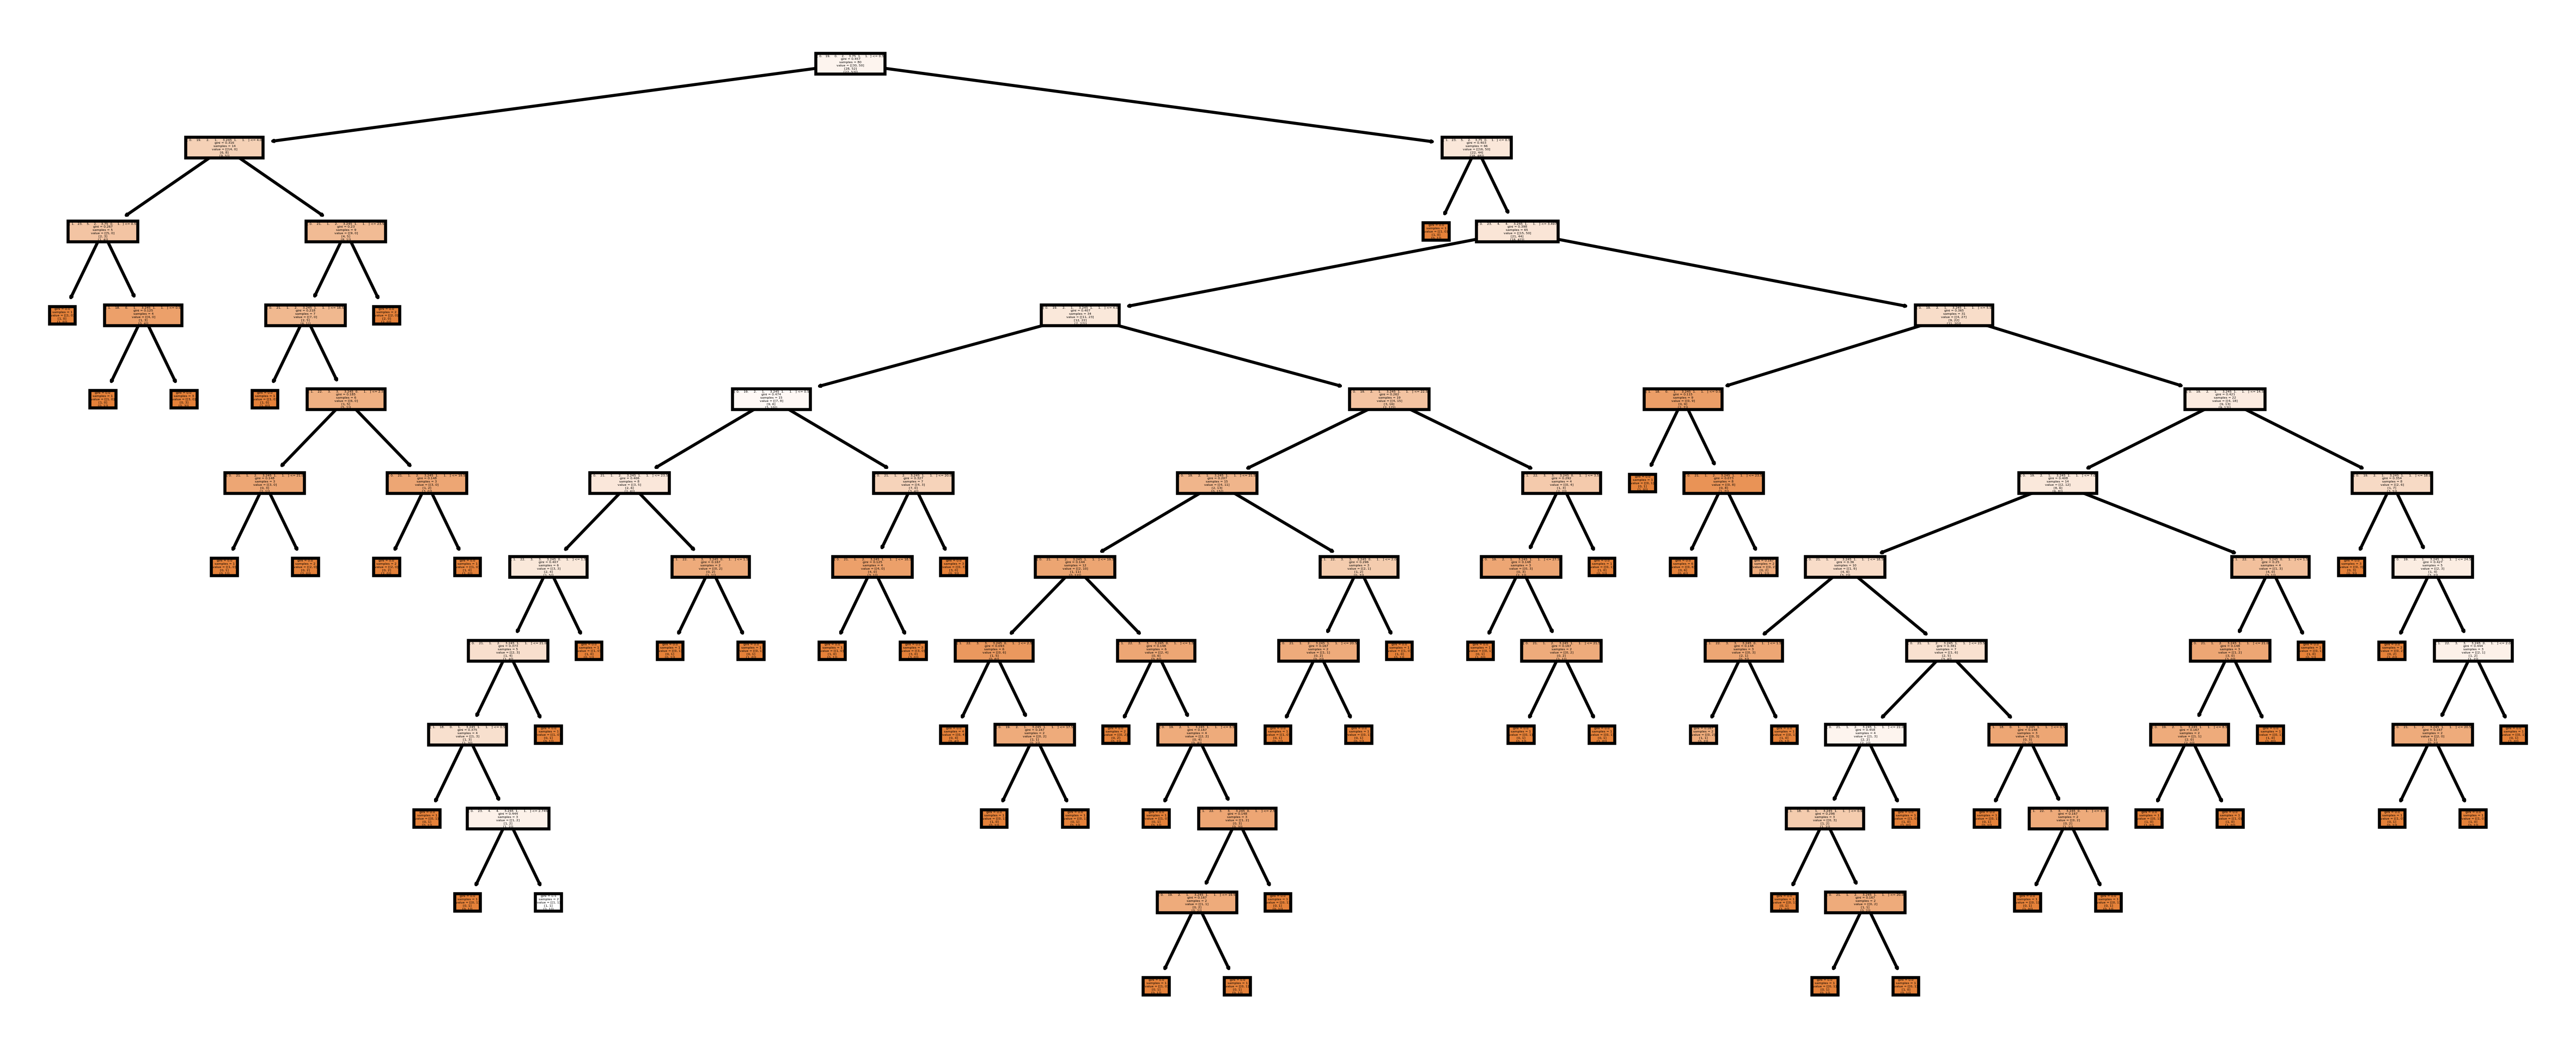

In [6]:
A = data.drop(columns=['Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?'], axis = 1)
B = data[['Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?']]

a_train, a_test, b_train, b_test = train_test_split(A,B, test_size = 0.2, random_state = 42)
dtree = DecisionTreeClassifier()
dtree = dtree.fit(a_train, b_train)
predict = dtree.predict(a_test)
A=A.to_numpy()
B=B.to_numpy()

fig, axes = plt.subplots(figsize = (15,6),dpi=400)
tree.plot_tree(dtree,feature_names = A,class_names=B,filled=True)
plt.show()

In [ ]:
!pip install ipywidgets

In [10]:
import ipywidgets as widgets
from IPython.display import display, clear_output
age_entry = widgets.IntText(description="Age:")
gnd_entry = widgets.Text(description="Gender:")
crs_entry = widgets.Text(description="Course:")
yos_entry = widgets.IntText(description="year of study:")
gpa_entry = widgets.FloatText(description="GPA:")
mstat_entry = widgets.Text(description="Marital Status (y/n):")
spc_entry = widgets.Text(description="Specialist Treatment (y/n):")

from sklearn.tree import DecisionTreeClassifier
import numpy as np

def values(button):
  age = age_entry.value
  gnd = {"m": 0, "f": 1}.get(gnd_entry.value.strip().lower()[:3], -1) # Handle invalid gender input
  crs = unid.get(crs_entry.value.strip().lower()[:3], -1) # Handle invalid course input
  yos = yos_entry.value
  gpa = gpa_entry.value
  mstat = {"y":0,"n":1}.get(mstat_entry.value.strip().lower()[:3], -1) # Handle invalid marital status input
  spc = {"y":0,"n":1}.get(spc_entry.value.strip().lower()[:3], -1) # Handle invalid specialist treatment input

  # Check for missing values and provide feedback to the user
  if -1 in [gnd, crs, mstat, spc]:
    clear_output()
    display(title_label, age_entry, gnd_entry, crs_entry, yos_entry, gpa_entry, mstat_entry, spc_entry, button,
            widgets.HTML(value="<h3>Error: Please check your inputs for Gender, Course, Marital Status, and Specialist Treatment.</h3>"))
    return

  Prediction_result = ('Predict disorder: ', dtree.predict([[age, gnd, crs, yos, gpa, mstat, spc]]))
  ans = "Diagnosis\n"

  if Prediction_result[1][0][0] == 0:
    ans += "Depression Prediction = positive"
    text = gTTS(ans, lang='en')
  elif Prediction_result[1][0][0] == 1:
    ans += "Depression Prediction = negative"
    text = gTTS(ans, lang='en')
  if Prediction_result[1][0][1] == 0:
    ans += "\nAnxiety Prediction = positive"
    text = gTTS(ans, lang='en')
  elif Prediction_result[1][0][1] == 1:
    ans += "\nAnxiety Prediction = negative"
    text = gTTS(ans, lang='en')
  if Prediction_result[1][0][2] == 0:
    ans += "\nPanic Attack Prediction = positive"
    text = gTTS(ans, lang='en')
  elif Prediction_result[1][0][2] == 1:
    ans += "\nPanic Attack Prediction = negative"
    text = gTTS(ans, lang='en')
  clear_output()
  audio_file = "output.mp3"
  text.save(audio_file)
  t=Audio(audio_file,autoplay=True)
  display(title_label, age_entry, gnd_entry, crs_entry, yos_entry, gpa_entry, mstat_entry, spc_entry, button, widgets.HTML(value=f"<h3>{ans}</h3>"))
  display(t)


button = widgets.Button(description="Predict disorder")
button.on_click(values)
title_label = widgets.HTML(value="<h1>Mental Doc</h1>")
display(title_label, age_entry, gnd_entry, crs_entry, yos_entry, gpa_entry, mstat_entry, spc_entry, button)

HTML(value='<h1>Mental Doc</h1>')

IntText(value=20, description='Age:')

Text(value='f', description='Gender:')

Text(value='Laws', description='Course:')

IntText(value=1, description='year of study:')

FloatText(value=3.0, description='GPA:')

Text(value='n', description='Marital Status (y/n):')

Text(value='n', description='Specialist Treatment (y/n):')

Button(description='Predict disorder', style=ButtonStyle())

HTML(value='<h3>Diagnosis\nDepression Prediction = +ve\nAnxiety Prediction = +ve\nPanic Attack Prediction = -v…